# Data Science Project - Airbnb Price Prediction

In [627]:
# DATA CAPSTONE PROJECT
# BY: Dwisha Mehta

In [2]:
import pandas as pd
import numpy as np
import re
import string
from collections import OrderedDict
from cleantext import clean
import emoji
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
from numpy import sqrt
from collections import OrderedDict
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.evaluate import permutation_test
from scipy import stats
from statsmodels.stats import weightstats as stests
from numpy import sqrt, abs, round
from scipy.stats import norm, uniform, zscore
from scipy.stats import ttest_ind
from statsmodels.stats.weightstats import ztest as ztest
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import accuracy_score
import haversine as hs
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from statistics import mean
from sklearn.metrics import mean_absolute_error as mse
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from numpy import absolute
from numpy import sqrt

Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


In [5]:
#Read the data 
airbnb = pd.read_csv('airbnb_edited.csv') 
airbnb = airbnb.drop(['Unnamed: 0'], axis = 1)

# Feature Engineering

In [6]:
airbnb.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,floor,noise(dB),price,year,month,day
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,1,9.0,0.2100,1.0,69.056465,149,2018.0,10.0,19.0
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1,45.0,0.3800,1.0,56.054278,225,2019.0,5.0,21.0
2,Manhattan,Harlem,40.80902,-73.94190,Private room,3,0.0,1.2132,1.0,56.054278,150,2019.0,5.0,21.0
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,1,270.0,4.6400,1.0,69.056465,89,2019.0,7.0,5.0
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,10,9.0,0.1000,1.0,56.054278,80,2018.0,11.0,19.0


In [7]:
airbnb['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [8]:
def latitude(value):
    if value == 'Brooklyn':
        return '40.650002'
    if value == 'Manhattan':
        return '40.776676'
    if value == 'Queens':
        return '40.742054'
    if value == 'Staten Island':
        return '40.579021'
    if value == 'Bronx':
        return '40.837048'

airbnb['neigh_lat'] = airbnb['neighbourhood_group'].apply(latitude)

In [9]:
def longitude(value):
    if value == 'Brooklyn':
        return '-73.949997'
    if value == 'Manhattan':
        return '-73.971321'
    if value == 'Queens':
        return '-73.769417'
    if value == 'Staten Island':
        return '-74.151535'
    if value == 'Bronx':
        return '-73.865433'
    
airbnb['neigh_long'] = airbnb['neighbourhood_group'].apply(longitude)

In [10]:
from math import radians, cos, sin, asin, sqrt
# Implement the formula below
def distance_d(LaA, LaB, LoA, LoB):
# The function "radians" is found in the math module, It's also used to convert radians to degrees.  
    
    # The "Haversine formula" is used.
    D_Lo = LoB - LoA 
    D_La = LaB - LaA 
    P = sin(D_La / 2)**2 + cos(LaA) * cos(LaB) * sin(D_Lo / 2)**2  
   
    Q = 2 * asin(sqrt(P))   
    # The earth's radius in kilometers.
    R_km = 6371  
# Then we'll compute the outcome.
    return(Q * R_km)
airbnb['latitude']= airbnb['latitude'].astype(float)
airbnb['neigh_lat']= airbnb['neigh_lat'].astype(float)
airbnb['longitude']= airbnb['longitude'].astype(float)
airbnb['neigh_long']= airbnb['neigh_long'].astype(float)
airbnb['neigh_distance'] = airbnb.apply(lambda x: distance_d(x.latitude, x.neigh_lat, x.longitude, x.neigh_long), axis=1)

In [11]:
airbnb[['nyc_lat', 'nyc_long']] = [40.758896,-73.985130]
airbnb['nycdistance'] = airbnb.apply(lambda x: distance_d(x.latitude, x.nyc_lat, x.longitude, x.nyc_long), axis=1)

In [12]:
airbnb[['timesquare_lat', 'timesquare_long']] = [40.758896,-73.985130]
airbnb['timesquaredist'] = airbnb.apply(lambda x: distance_d(x.latitude, x.timesquare_lat, x.longitude, x.timesquare_long), axis=1)

In [13]:
airbnb[['empire_lat', 'empire_long']] = [40.748817,-73.985428]

airbnb['empiredist'] = airbnb.apply(lambda x: distance_d(x.latitude, x.empire_lat, x.longitude, x.empire_long), axis=1)


In [14]:
airbnb[airbnb['neighbourhood']== 'Graniteville']

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,floor,noise(dB),...,neigh_distance,nyc_lat,nyc_long,nycdistance,timesquare_lat,timesquare_long,timesquaredist,empire_lat,empire_long,empiredist
780,Staten Island,Graniteville,40.62109,-74.16534,Private room,3,80.0,0.92,1.0,51.96436,...,281.301258,40.758896,-73.98513,1434.230087,40.758896,-73.98513,1434.230087,40.748817,-73.985428,1393.712368
26083,Staten Island,Graniteville,40.62439,-74.16634,Entire home/apt,1,36.0,2.67,1.0,51.96436,...,303.222697,40.758896,-73.98513,1426.748606,40.758896,-73.98513,1426.748606,40.748817,-73.985428,1386.974489
28713,Staten Island,Graniteville,40.62301,-74.16558,Entire home/apt,4,7.0,1.01,1.0,51.96436,...,293.421804,40.758896,-73.98513,1428.129094,40.758896,-73.98513,1428.129094,40.748817,-73.985428,1387.997832


# Outlier Detection

In [15]:
airbnb.columns

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'floor', 'noise(dB)', 'price', 'year', 'month', 'day', 'neigh_lat',
       'neigh_long', 'neigh_distance', 'nyc_lat', 'nyc_long', 'nycdistance',
       'timesquare_lat', 'timesquare_long', 'timesquaredist', 'empire_lat',
       'empire_long', 'empiredist'],
      dtype='object')

In [16]:
airbnb.describe()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,floor,noise(dB),price,year,month,...,neigh_distance,nyc_lat,nyc_long,nycdistance,timesquare_lat,timesquare_long,timesquaredist,empire_lat,empire_long,empiredist
count,39117.000000,39117.000000,39117.000000,39117.000000,39117.000000,39117.00000,39117.000000,39117.000000,39117.000000,39117.000000,...,39117.000000,3.911700e+04,3.911700e+04,39117.000000,3.911700e+04,3.911700e+04,39117.000000,3.911700e+04,3.911700e+04,39117.000000
mean,40.728897,-73.952088,7.003349,27.352530,1.213200,1.58192,62.700221,152.431194,2018.316614,6.151878,...,337.977653,4.075890e+01,-7.398513e+01,449.537129,4.075890e+01,-7.398513e+01,449.537129,4.074882e+01,-7.398543e+01,429.411279
std,0.054520,0.046141,20.695672,43.845541,1.286791,1.49254,6.515355,243.141827,1.163886,2.487255,...,209.367182,1.158910e-11,3.953510e-11,290.241069,1.158910e-11,3.953510e-11,290.241069,1.381313e-11,2.486931e-12,286.657532
min,40.508680,-74.244420,1.000000,0.000000,0.010000,0.00000,22.964360,0.000000,2011.000000,1.000000,...,3.549335,4.075890e+01,-7.398513e+01,2.052331,4.075890e+01,-7.398513e+01,2.052331,4.074882e+01,-7.398543e+01,1.650187
25%,40.689980,-73.982980,1.000000,2.000000,0.280000,1.00000,56.054278,69.000000,2018.000000,5.000000,...,199.153676,4.075890e+01,-7.398513e+01,238.127793,4.075890e+01,-7.398513e+01,238.127793,4.074882e+01,-7.398543e+01,213.278634
50%,40.722980,-73.955630,2.000000,13.000000,1.213200,1.00000,62.478632,105.000000,2019.000000,6.000000,...,308.132525,4.075890e+01,-7.398513e+01,414.970264,4.075890e+01,-7.398513e+01,414.970264,4.074882e+01,-7.398543e+01,404.348879
75%,40.763090,-73.936340,5.000000,27.352530,1.213200,1.00000,69.056465,175.000000,2019.000000,7.000000,...,402.083297,4.075890e+01,-7.398513e+01,584.882609,4.075890e+01,-7.398513e+01,584.882609,4.074882e+01,-7.398543e+01,552.743298
max,40.913060,-73.712990,1250.000000,629.000000,20.940000,100.00000,98.056465,10000.000000,2019.000000,12.000000,...,1287.899565,4.075890e+01,-7.398513e+01,2263.658024,4.075890e+01,-7.398513e+01,2263.658024,4.074882e+01,-7.398543e+01,2216.698642


In [17]:
airbnb['noise(dB)']= airbnb['noise(dB)'].astype(float)
airbnb['minimum_nights']= airbnb['minimum_nights'].astype(int)
airbnb['number_of_reviews']= airbnb['number_of_reviews'].astype(float)
airbnb['price']= airbnb['price'].astype(float)
airbnb['floor']= airbnb['floor'].astype(int)

In [18]:
def outliers(df, ft):
    Q1= df[ft].quantile(0.25)
    Q3= df[ft].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 -1.5*IQR
    upper_bound = Q1 +1.5*IQR
    
    ls = df.index[(df[ft] < lower_bound)]
    return ls
    

In [19]:
index_list = []
for feature in ['noise(dB)','minimum_nights','longitude','latitude','number_of_reviews','reviews_per_month', 'price', 'floor','nycdistance','neigh_distance', 'neigh_lat', 'neigh_long','nyc_long' ]:
    index_list.extend(outliers(airbnb, feature))

In [20]:
def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [21]:
new = remove(airbnb, index_list)

In [22]:
# As the outlier removing method also removed some of the neighbourhood groups, there might be issues in accuracy of model
new['neighbourhood_group'].value_counts()

Manhattan    17328
Brooklyn     16000
Queens        4523
Bronx          872
Name: neighbourhood_group, dtype: int64

In [23]:
new.shape

(38723, 26)

# Converting categorical variables

In [24]:
neighbourhood_dummies = pd.get_dummies(new['neighbourhood_group'],drop_first=True)

In [25]:
new = pd.concat([new.drop('neighbourhood_group',axis=1),neighbourhood_dummies],axis=1)

In [26]:
roomtype_dummies = pd.get_dummies(new['room_type'],drop_first=True)

In [27]:
new = pd.concat([new.drop('room_type',axis=1),roomtype_dummies],axis=1)

In [28]:
new.drop([ 'nyc_long', 'nyc_lat','neigh_long', 'neigh_lat', 'year', 'day', 'month', 'timesquare_lat', 'timesquare_long', 'empire_lat', 'empire_long'],axis=1,inplace=True)

In [29]:
le = LabelEncoder()

In [30]:
new['neighbourhood']= le.fit_transform(new['neighbourhood'])

In [31]:
new.isna().sum()

neighbourhood        0
latitude             0
longitude            0
minimum_nights       0
number_of_reviews    0
reviews_per_month    0
floor                0
noise(dB)            0
price                0
neigh_distance       0
nycdistance          0
timesquaredist       0
empiredist           0
Brooklyn             0
Manhattan            0
Queens               0
Private room         0
Shared room          0
dtype: int64

In [32]:
new.columns

Index(['neighbourhood', 'latitude', 'longitude', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month', 'floor', 'noise(dB)', 'price',
       'neigh_distance', 'nycdistance', 'timesquaredist', 'empiredist',
       'Brooklyn', 'Manhattan', 'Queens', 'Private room', 'Shared room'],
      dtype='object')

# Correlation

In [33]:
df = new

In [34]:
correlations_data = new.corr()['price'].sort_values()

In [35]:
# No variables are very highly positively or negatively correlated so there is no need to drop them
correlations_data.to_csv('correlation.csv')

In [36]:
correlations_data

Private room        -0.245505
empiredist          -0.182093
nycdistance         -0.179510
timesquaredist      -0.179510
longitude           -0.165906
Brooklyn            -0.101907
Queens              -0.083254
neigh_distance      -0.075142
noise(dB)           -0.054712
Shared room         -0.051888
number_of_reviews   -0.040386
reviews_per_month   -0.031651
latitude             0.031285
minimum_nights       0.042874
neighbourhood        0.064364
floor                0.136364
Manhattan            0.167499
price                1.000000
Name: price, dtype: float64

Text(0.5, 1.0, 'airbnb.corr()')

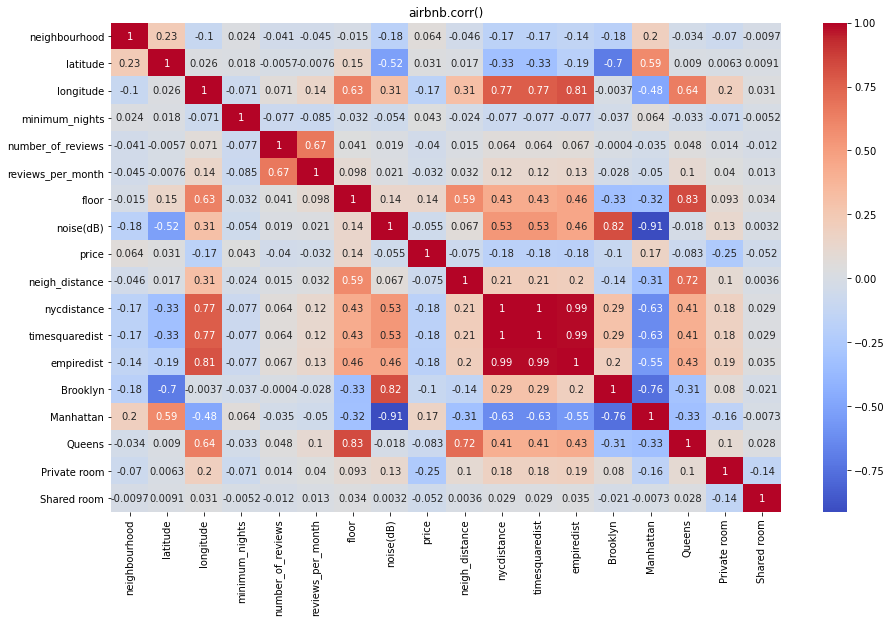

In [37]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),cmap='coolwarm', annot = True)
plt.title('airbnb.corr()')

# Feature Selection

[0.00349861 0.00946421 0.01159115 0.0086789  0.00731764 0.00899612
 0.31727447 0.4432758  0.01002505 0.00944586 0.01051457 0.01013862
 0.02754432 0.04697192 0.00885737 0.06172606 0.00467934]


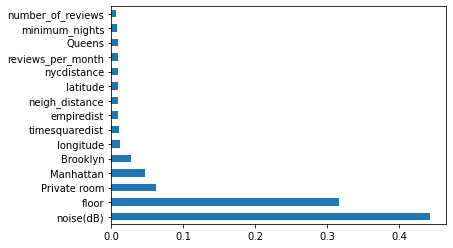

In [38]:
import pandas as pd
import numpy as np
X = new.drop(['price'], axis =1)
y = new['price']   
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

# Predictive Modeling 

# # Linear Regression

In [39]:
X = new.drop('price', axis = 1)
y = new['price']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [41]:
lm = LinearRegression()

In [42]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(lm, X, y, cv=cv,scoring='neg_mean_squared_error')
print("Cross-validated scores:", scores)

Cross-validated scores: [ -3719.63138873  -3900.14510018  -7978.1479953  -15964.13432345
  -9046.34819068 -16225.87504395  -9477.59872391  -4025.49835482
  -5561.72638534  -4192.666951  ]


In [43]:
print('Cross validation MAE:', mean(scores))
print('Cross validation RMSE:', sqrt(mean(absolute(scores))))

Cross validation MAE: -8009.177245735688
Cross validation RMSE: 89.49400675875277


In [44]:
lm_model = lm.fit(X_train, y_train)

In [45]:
predictions = lm_model.predict(X_test)

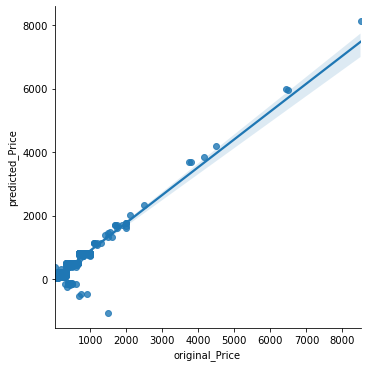

In [46]:
predictionsdata = pd.DataFrame({"original_Price": y_test.values, "predicted_Price": predictions})
sns.lmplot(x="original_Price",y="predicted_Price",data=predictionsdata)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


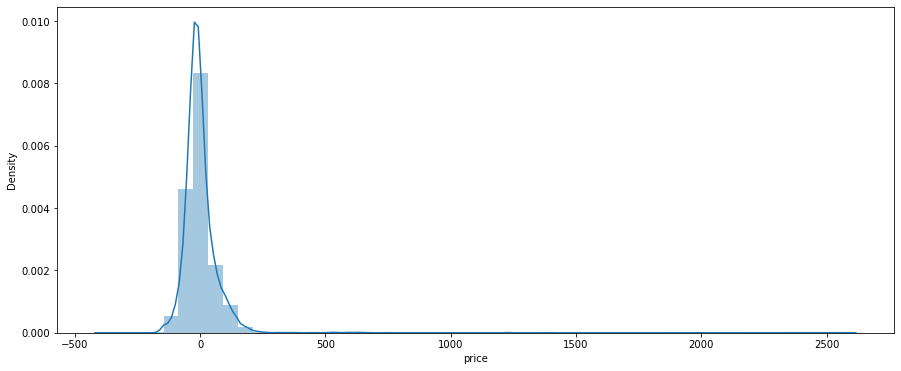

In [47]:
fig = plt.figure(figsize = (15,6))
plt.ticklabel_format(style='plain') 
sns.distplot((y_test-predictions),bins=50);

In [51]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("R2 score =", round(metrics.r2_score(y_test, predictions), 2))

MAE: 41.91856459175832
MSE: 5253.984896190662
RMSE: 72.48437691110176
R2 score = 0.89


In [52]:
lm_model.coef_

array([ 6.02132104e-02, -1.17155534e+02,  2.88315577e+01,  1.05303969e-01,
       -2.29260755e-02,  4.50108709e-01,  1.91240141e+01,  3.05336173e+02,
       -7.35265293e-03,  3.67662420e-02,  3.67662420e-02, -1.16660509e-01,
        2.90972772e+03,  6.91055369e+03,  4.87049224e+03, -7.50268042e+01,
       -8.58256505e+01])

# Feature Importance

Feature: 0, Score: 0.06021
Feature: 1, Score: -117.15553
Feature: 2, Score: 28.83156
Feature: 3, Score: 0.10530
Feature: 4, Score: -0.02293
Feature: 5, Score: 0.45011
Feature: 6, Score: 19.12401
Feature: 7, Score: 305.33617
Feature: 8, Score: -0.00735
Feature: 9, Score: 0.03677
Feature: 10, Score: 0.03677
Feature: 11, Score: -0.11666
Feature: 12, Score: 2909.72772
Feature: 13, Score: 6910.55369
Feature: 14, Score: 4870.49224
Feature: 15, Score: -75.02680
Feature: 16, Score: -85.82565


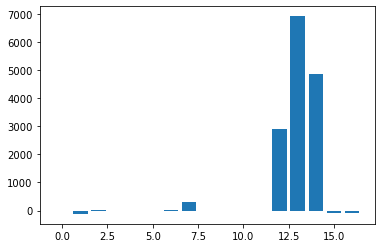

In [53]:
importance = lm_model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Random Forest 

In [54]:
X = new.drop('price', axis =1)
y = new['price']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [56]:
# Performed hyperparameter tuning, and got the best parameters for random forest regressor
rfc = RandomForestRegressor(n_estimators=100,
                               criterion='squared_error',
                               max_features=6,
                               n_jobs=-1,
                               random_state=1)

In [57]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(rfc, X, y, cv=cv,scoring='neg_mean_squared_error')
print("Cross-validated scores:", scores)

Cross-validated scores: [ -4344.97469945  -9909.72690226  -9844.98147366 -13194.01908794
  -4802.1695604  -14881.13169307  -6175.67259358  -4721.76895938
  -4707.16315136  -5625.30895811]


In [58]:
print('Cross validation MAE:', mean(scores))
print('Cross validation RMSE:', sqrt(mean(absolute(scores))))

Cross validation MAE: -7820.6917079220975
Cross validation RMSE: 88.43467480531659


In [59]:
rfc.fit(X_train,y_train)

RandomForestRegressor(max_features=6, n_jobs=-1, random_state=1)

In [60]:
predictions = rfc.predict(X_test)

In [61]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("R2 score =", round(metrics.r2_score(y_test, predictions), 2))

MAE: 37.25394921454702
MSE: 5010.0763115343225
RMSE: 70.78189253993088
R2 score = 0.9


# Predictive Modeling on different dataset

In [572]:
train = pd.read_csv('playoffs_train (1).csv')

In [573]:
test = pd.read_csv('playoffs_test (1).csv')

# Feature Engineering

In [574]:
def latitude(value):
    if value == 'Brooklyn':
        return '40.650002'
    if value == 'Manhattan':
        return '40.776676'
    if value == 'Queens':
        return '40.742054'
    if value == 'Staten Island':
        return '40.579021'
    if value == 'Bronx':
        return '40.837048'

train['neigh_lat'] = train['neighbourhood_group'].apply(latitude)


def latitude(value):
    if value == 'Brooklyn':
        return '40.650002'
    if value == 'Manhattan':
        return '40.776676'
    if value == 'Queens':
        return '40.742054'
    if value == 'Staten Island':
        return '40.579021'
    if value == 'Bronx':
        return '40.837048'

test['neigh_lat'] = test['neighbourhood_group'].apply(latitude)

In [575]:
def longitude(value):
    if value == 'Brooklyn':
        return '-73.949997'
    if value == 'Manhattan':
        return '-73.971321'
    if value == 'Queens':
        return '-73.769417'
    if value == 'Staten Island':
        return '-74.151535'
    if value == 'Bronx':
        return '-73.865433'
    
train['neigh_long'] = train['neighbourhood_group'].apply(longitude)

def longitude(value):
    if value == 'Brooklyn':
        return '-73.949997'
    if value == 'Manhattan':
        return '-73.971321'
    if value == 'Queens':
        return '-73.769417'
    if value == 'Staten Island':
        return '-74.151535'
    if value == 'Bronx':
        return '-73.865433'
    
test['neigh_long'] = test['neighbourhood_group'].apply(longitude)

In [576]:
from math import radians, cos, sin, asin, sqrt
# Implement the formula below
def distance_d(LaA, LaB, LoA, LoB):
# The function "radians" is found in the math module, It's also used to convert radians to degrees.  
   
    # The "Haversine formula" is used.
    D_Lo = LoB - LoA 
    D_La = LaB - LaA 
    P = sin(D_La / 2)**2 + cos(LaA) * cos(LaB) * sin(D_Lo / 2)**2  
   
    Q = 2 * asin(sqrt(P))   
    # The earth's radius in kilometers.
    R_km = 6371  
# Then we'll compute the outcome.
    return(Q * R_km)
train['latitude']= train['latitude'].astype(float)
train['neigh_lat']= train['neigh_lat'].astype(float)
train['longitude']= train['longitude'].astype(float)
train['neigh_long']= train['neigh_long'].astype(float)
train['neigh_distance'] = train.apply(lambda x: distance_d(x.latitude, x.neigh_lat, x.longitude, x.neigh_long), axis=1)



test['latitude']= test['latitude'].astype(float)
test['neigh_lat']= test['neigh_lat'].astype(float)
test['longitude']= test['longitude'].astype(float)
test['neigh_long']= test['neigh_long'].astype(float)
test['neigh_distance'] = test.apply(lambda x: distance_d(x.latitude, x.neigh_lat, x.longitude, x.neigh_long), axis=1)

In [577]:
train[['nyc_lat', 'nyc_long']] = [40.758896,-73.985130]
train['nycdistance'] = train.apply(lambda x: distance_d(x.latitude, x.nyc_lat, x.longitude, x.nyc_long), axis=1)


test[['nyc_lat', 'nyc_long']] = [40.758896,-73.985130]
test['nycdistance'] = test.apply(lambda x: distance_d(x.latitude, x.nyc_lat, x.longitude, x.nyc_long), axis=1)

In [578]:
train[['cen_lat', 'cen_long']] = [40.752655, -73.977295]
train['cendistance'] = train.apply(lambda x: distance_d(x.latitude, x.cen_lat, x.longitude, x.cen_long), axis=1)


test[['cen_lat', 'cen_long']] = [40.752655, -73.977295]
test['cendistance'] = test.apply(lambda x: distance_d(x.latitude, x.cen_lat, x.longitude, x.cen_long), axis=1)

In [579]:
train[['wall_lat', 'wall_long']] = [40.706005, -74.008827]
train['walldistance'] = train.apply(lambda x: distance_d(x.latitude, x.wall_lat, x.longitude, x.wall_long), axis=1)


test[['wall_lat', 'wall_long']] = [40.706005, -74.008827]
test['walldistance'] = test.apply(lambda x: distance_d(x.latitude, x.wall_lat, x.longitude, x.wall_long), axis=1)

In [580]:
train[['timesquare_lat', 'timesquare_long']] = [40.758896,-73.985130]
test[['timesquare_lat', 'timesquare_long']] = [40.758896,-73.985130]

train['timesquaredist'] = train.apply(lambda x: distance_d(x.latitude, x.timesquare_lat, x.longitude, x.timesquare_long), axis=1)
test['timesquaredist'] = test.apply(lambda x: distance_d(x.latitude, x.timesquare_lat, x.longitude, x.timesquare_long), axis=1)

In [581]:
train[['empire_lat', 'empire_long']] = [40.748817,-73.985428]
test[['empire_lat', 'empire_long']] = [40.748817,-73.985428]

train['empiredist'] = train.apply(lambda x: distance_d(x.latitude, x.empire_lat, x.longitude, x.empire_long), axis=1)
test['empiredist'] = test.apply(lambda x: distance_d(x.latitude, x.empire_lat, x.longitude, x.empire_long), axis=1)

In [582]:
le = LabelEncoder()

train['neighbourhood']= le.fit_transform(train['neighbourhood'])

test['neighbourhood']= le.fit_transform(test['neighbourhood'])


In [583]:
train['neighbourhood_group']= le.fit_transform(train['neighbourhood_group'])

test['neighbourhood_group']= le.fit_transform(test['neighbourhood_group'])


In [584]:
train['room_type']= le.fit_transform(train['room_type'])

test['room_type']= le.fit_transform(test['room_type'])


In [585]:
train.drop(['id','host_id','name','host_name', 'nyc_lat',
            'nyc_long', 'timesquare_lat', 'timesquare_long','empire_lat',
            'empire_long'],axis=1,inplace=True)
test.drop(['id','host_id','name','host_name', 'nyc_lat',
            'nyc_long', 'timesquare_lat', 'timesquare_long','empire_lat',
            'empire_long'],axis=1,inplace=True)

Text(0.5, 1.0, 'train.corr()')

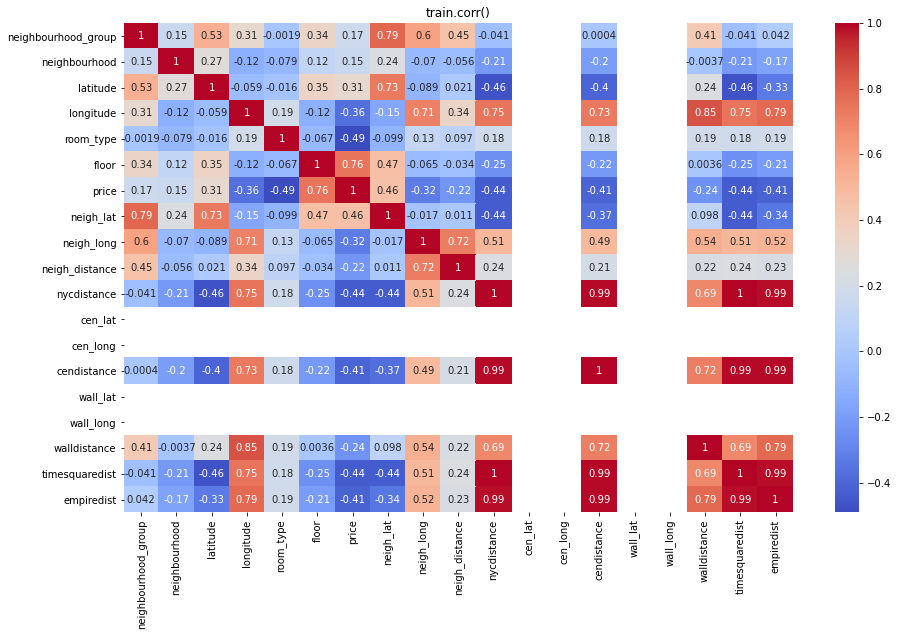

In [586]:
plt.figure(figsize=(15,9))
sns.heatmap(train.corr(),cmap='coolwarm', annot = True)
plt.title('train.corr()')

# Random Forest

In [78]:
X = train.drop(['price','neigh_long', 'nycdistance', 'neigh_lat', 'man_lat', 'man_long'], axis =1)
y = train['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [79]:
# Performed hyperparameter tuning, and got the best parameters for random forest regressor
rfc = RandomForestRegressor(n_estimators=100,
                               criterion='squared_error',
                               max_features=5,
                               n_jobs=-1,
                               random_state=1)

In [80]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(rfc, X, y, cv=cv,scoring='neg_mean_squared_error')
print("Cross-validated scores:", scores)

Cross-validated scores: [-2959.66750564 -2788.20147756 -3003.7469706  -3136.19401316
 -3033.44858563 -3443.28554867 -3009.21991784 -3225.08728868
 -3279.87116157 -2952.19489814]


In [81]:
mean(scores)

-3083.0917367477277

In [82]:
print('Cross validation MAE:', mean(scores))
print('Cross validation RMSE:', sqrt(mean(absolute(scores))))

Cross validation MAE: -3083.0917367477277
Cross validation RMSE: 55.525595329971274


# Decision Trees

In [611]:
X = train.drop(['price','neigh_long', 'nycdistance','neigh_lat', 'cen_lat', 'wall_lat', 'wall_long','cen_long','empiredist'], axis =1)
y = train['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)



In [612]:
X

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,floor,neigh_distance,cendistance,walldistance,timesquaredist
0,0,54,40.69466,-73.97151,0,1,314.966380,371.294327,246.252893,418.226201
1,1,124,40.73545,-74.00686,0,16,346.232889,217.169690,188.006191,203.250564
2,0,116,40.66132,-73.99192,0,1,272.252020,589.171710,303.914328,623.133313
3,1,86,40.75357,-73.97313,1,16,147.656211,27.068650,378.034147,83.394628
4,0,20,40.70092,-73.92945,0,16,349.146038,447.584707,501.999126,510.582158
...,...,...,...,...,...,...,...,...,...,...
35568,0,126,40.71091,-73.96029,1,1,393.405945,286.932385,308.117021,343.838046
35569,1,123,40.83365,-73.94459,1,1,400.891699,556.389413,909.810827,541.633960
35570,1,42,40.78719,-73.95201,1,16,139.896602,272.447630,630.338208,277.149216
35571,0,116,40.64318,-74.01329,1,1,398.043177,733.435471,401.238858,758.306642


In [613]:
parameters={"splitter":["best","random"],
            "max_depth" : [3,5,7,9,11,12],
           "min_samples_leaf":[0.001],
           "min_weight_fraction_leaf":[0.1],
           "max_features":["auto","log2","sqrt"],
           "max_leaf_nodes":[10,20,30,40,50,60] }

In [590]:
tuning_model=GridSearchCV(reg_decision_model,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [556]:
tuning_model.fit(X_train, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3514.059 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3591.287 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3556.942 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-6835.468 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-6763.774 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=0.001, 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/l

[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3556.942 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-6358.205 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-10814.118 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-12146.141 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3514.059 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3591.2

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/l

[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3591.287 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3556.942 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-12982.394 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-6675.756 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-10069.946 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3514.0

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/l

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3514.059 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3591.287 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3556.942 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-4441.038 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-6730.280 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-10681.85

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/l

[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-10289.147 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-13474.915 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-19685.498 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-18407.467 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-10571.097 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-165

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/l

[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-7540.072 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-3854.629 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-3719.039 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3472.693 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3550.671 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3522.901

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/l

[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3550.671 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3522.901 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-14337.005 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-3837.231 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-9463.610 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3472.69

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/l

[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=50, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3472.693 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=50, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3550.671 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=50, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3522.901 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=50, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-8361.114 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=50, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-3993.964 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=50, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-3747.368

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/l

[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=60, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3522.901 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=60, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-6853.732 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=60, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-3820.080 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=60, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-9769.418 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-14711.993 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-10250.0

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/l

[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=10, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3522.901 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=10, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-11165.557 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=10, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-3750.850 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=10, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-13160.425 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=20, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3472.693 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=20, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3550.6

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/l

[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=30, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3472.693 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=30, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3550.671 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=30, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3522.901 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=30, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-14490.417 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=30, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-5936.300 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=30, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-6000.06

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/l

[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=40, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3522.901 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=40, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-7282.155 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=40, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-6705.787 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=40, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-11312.609 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=50, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3472.693 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=50, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3550.67

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/l

[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=60, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3472.693 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=60, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3550.671 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=60, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3522.901 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=60, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-3432.016 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=60, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-9734.236 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=60, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-12173.17

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/l

[CV 2/3] END max_depth=9, max_features=auto, max_leaf_nodes=10, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3550.671 total time=   0.0s
[CV 3/3] END max_depth=9, max_features=auto, max_leaf_nodes=10, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3522.901 total time=   0.0s
[CV 1/3] END max_depth=9, max_features=auto, max_leaf_nodes=10, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-4962.920 total time=   0.0s
[CV 2/3] END max_depth=9, max_features=auto, max_leaf_nodes=10, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-4972.888 total time=   0.0s
[CV 3/3] END max_depth=9, max_features=auto, max_leaf_nodes=10, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-9634.715 total time=   0.0s
[CV 1/3] END max_depth=9, max_features=auto, max_leaf_nodes=20, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3472.693

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/l

[CV 2/3] END max_depth=9, max_features=auto, max_leaf_nodes=20, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-3838.907 total time=   0.0s
[CV 3/3] END max_depth=9, max_features=auto, max_leaf_nodes=20, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-6086.536 total time=   0.0s
[CV 1/3] END max_depth=9, max_features=auto, max_leaf_nodes=30, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3472.693 total time=   0.0s
[CV 2/3] END max_depth=9, max_features=auto, max_leaf_nodes=30, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3550.671 total time=   0.0s
[CV 3/3] END max_depth=9, max_features=auto, max_leaf_nodes=30, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3522.901 total time=   0.0s
[CV 1/3] END max_depth=9, max_features=auto, max_leaf_nodes=30, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-12613.32

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/l

[CV 2/3] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3550.671 total time=   0.0s
[CV 3/3] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3522.901 total time=   0.0s
[CV 1/3] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-6293.888 total time=   0.0s
[CV 2/3] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-6350.969 total time=   0.0s
[CV 3/3] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-5164.245 total time=   0.0s
[CV 1/3] END max_depth=9, max_features=auto, max_leaf_nodes=50, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3472.693

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/l

[CV 2/3] END max_depth=9, max_features=auto, max_leaf_nodes=50, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-10895.241 total time=   0.0s
[CV 3/3] END max_depth=9, max_features=auto, max_leaf_nodes=50, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-3903.291 total time=   0.0s
[CV 1/3] END max_depth=9, max_features=auto, max_leaf_nodes=60, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3472.693 total time=   0.0s
[CV 2/3] END max_depth=9, max_features=auto, max_leaf_nodes=60, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3550.671 total time=   0.0s
[CV 3/3] END max_depth=9, max_features=auto, max_leaf_nodes=60, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3522.901 total time=   0.0s
[CV 1/3] END max_depth=9, max_features=auto, max_leaf_nodes=60, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-4269.55

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_depth=9, max_features=log2, max_leaf_nodes=10, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-6566.861 total time=   0.0s
[CV 1/3] END max_depth=9, max_features=log2, max_leaf_nodes=10, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-13445.985 total time=   0.0s
[CV 2/3] END max_depth=9, max_features=log2, max_leaf_nodes=10, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-13051.089 total time=   0.0s
[CV 3/3] END max_depth=9, max_features=log2, max_leaf_nodes=10, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-16262.955 total time=   0.0s
[CV 1/3] END max_depth=9, max_features=log2, max_leaf_nodes=20, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-6582.456 total time=   0.0s
[CV 2/3] END max_depth=9, max_features=log2, max_leaf_nodes=20, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-13330

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/l

[CV 2/3] END max_depth=11, max_features=auto, max_leaf_nodes=10, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3550.671 total time=   0.0s
[CV 3/3] END max_depth=11, max_features=auto, max_leaf_nodes=10, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3522.901 total time=   0.0s
[CV 1/3] END max_depth=11, max_features=auto, max_leaf_nodes=10, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-5115.106 total time=   0.0s
[CV 2/3] END max_depth=11, max_features=auto, max_leaf_nodes=10, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-7708.005 total time=   0.0s
[CV 3/3] END max_depth=11, max_features=auto, max_leaf_nodes=10, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-10096.961 total time=   0.0s
[CV 1/3] END max_depth=11, max_features=auto, max_leaf_nodes=20, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/l

[CV 2/3] END max_depth=11, max_features=auto, max_leaf_nodes=20, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-5674.898 total time=   0.0s
[CV 3/3] END max_depth=11, max_features=auto, max_leaf_nodes=20, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-14604.047 total time=   0.0s
[CV 1/3] END max_depth=11, max_features=auto, max_leaf_nodes=30, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3472.693 total time=   0.0s
[CV 2/3] END max_depth=11, max_features=auto, max_leaf_nodes=30, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3550.671 total time=   0.0s
[CV 3/3] END max_depth=11, max_features=auto, max_leaf_nodes=30, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3522.901 total time=   0.0s
[CV 1/3] END max_depth=11, max_features=auto, max_leaf_nodes=30, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-1

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/l

[CV 2/3] END max_depth=11, max_features=auto, max_leaf_nodes=40, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3550.671 total time=   0.0s
[CV 3/3] END max_depth=11, max_features=auto, max_leaf_nodes=40, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3522.901 total time=   0.0s
[CV 1/3] END max_depth=11, max_features=auto, max_leaf_nodes=40, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-13726.998 total time=   0.0s
[CV 2/3] END max_depth=11, max_features=auto, max_leaf_nodes=40, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-6342.263 total time=   0.0s
[CV 3/3] END max_depth=11, max_features=auto, max_leaf_nodes=40, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-11924.681 total time=   0.0s
[CV 1/3] END max_depth=11, max_features=auto, max_leaf_nodes=50, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/l

[CV 3/3] END max_depth=11, max_features=auto, max_leaf_nodes=50, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-9093.259 total time=   0.0s
[CV 1/3] END max_depth=11, max_features=auto, max_leaf_nodes=60, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3472.693 total time=   0.0s
[CV 2/3] END max_depth=11, max_features=auto, max_leaf_nodes=60, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3550.671 total time=   0.0s
[CV 3/3] END max_depth=11, max_features=auto, max_leaf_nodes=60, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3522.901 total time=   0.0s
[CV 1/3] END max_depth=11, max_features=auto, max_leaf_nodes=60, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-7001.252 total time=   0.0s
[CV 2/3] END max_depth=11, max_features=auto, max_leaf_nodes=60, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-12

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_depth=11, max_features=log2, max_leaf_nodes=10, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-15971.417 total time=   0.0s
[CV 2/3] END max_depth=11, max_features=log2, max_leaf_nodes=10, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-13553.214 total time=   0.0s
[CV 3/3] END max_depth=11, max_features=log2, max_leaf_nodes=10, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-8272.064 total time=   0.0s
[CV 1/3] END max_depth=11, max_features=log2, max_leaf_nodes=20, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-6411.309 total time=   0.0s
[CV 2/3] END max_depth=11, max_features=log2, max_leaf_nodes=20, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-6369.536 total time=   0.0s
[CV 3/3] END max_depth=11, max_features=log2, max_leaf_nodes=20, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/l

[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=20, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3472.693 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=auto, max_leaf_nodes=20, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3550.671 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=auto, max_leaf_nodes=20, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3522.901 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=20, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-6424.526 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=auto, max_leaf_nodes=20, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-11584.322 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=auto, max_leaf_nodes=20, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-7

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/l

[CV 3/3] END max_depth=12, max_features=auto, max_leaf_nodes=30, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3522.901 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=30, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-5115.487 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=auto, max_leaf_nodes=30, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-9897.927 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=auto, max_leaf_nodes=30, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-4474.823 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3472.693 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-35

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/l

[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=50, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3472.693 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=auto, max_leaf_nodes=50, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3550.671 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=auto, max_leaf_nodes=50, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3522.901 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=50, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-11061.412 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=auto, max_leaf_nodes=50, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-9625.111 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=auto, max_leaf_nodes=50, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-1

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/l

[CV 3/3] END max_depth=12, max_features=auto, max_leaf_nodes=60, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-3522.901 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=60, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-6978.961 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=auto, max_leaf_nodes=60, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-7249.820 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=auto, max_leaf_nodes=60, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-6886.187 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-6562.002 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=log2, max_leaf_nodes=10, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-11

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_depth=12, max_features=log2, max_leaf_nodes=30, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-7737.628 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=log2, max_leaf_nodes=30, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score=-15424.255 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=log2, max_leaf_nodes=30, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-23387.429 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=log2, max_leaf_nodes=30, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-10100.589 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=log2, max_leaf_nodes=30, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=random;, score=-14513.307 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=log2, max_leaf_nodes=40, min_samples_leaf=0.001, min_weight_fraction_leaf=0.1, splitter=best;, score

/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(min_samples_leaf=0.0001),
             param_grid={'max_depth': [3, 5, 7, 9, 11, 12],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'max_leaf_nodes': [10, 20, 30, 40, 50, 60],
                         'min_samples_leaf': [0.001],
                         'min_weight_fraction_leaf': [0.1],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [557]:
tuning_model.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': 30,
 'min_samples_leaf': 0.001,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [614]:
decision_tree=DecisionTreeRegressor(
max_depth= 5,
# max_features = 'auto',
 #max_leaf_nodes=20,
 min_samples_leaf= 0.001,
 #min_weight_fraction_leaf= 0.1,
 #splitter='best'
)

In [615]:
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=0.001)

In [616]:
predictions = decision_tree.predict(X_test)

In [617]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("R2 score =", round(metrics.r2_score(y_test, predictions), 2))

MAE: 28.25007704984082
MSE: 2746.3405854826656
RMSE: 52.40553964499045
R2 score = 0.88


In [618]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(decision_tree, X, y, cv=cv,scoring='neg_mean_squared_error')
print("Cross-validated scores:", scores)

Cross-validated scores: [-2722.62513024 -2557.8021093  -2724.113497   -2777.0216488
 -2631.96008918 -3011.93361261 -2725.16450508 -2842.6282817
 -2955.66752143 -2712.35229809]


In [619]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv = 7)).mean()
    return rmse

In [620]:
rmse_cv(decision_tree)

52.54071147708983

In [621]:
mean(scores)

-2766.1268693438888

# Model on Test data

In [599]:
decision_tree=DecisionTreeRegressor(
 max_depth= 5,
 #max_features = 'auto',
 #max_leaf_nodes=10,
 min_samples_leaf= 0.001,
 #min_weight_fraction_leaf= 0.1,
 #splitter='best'
)


In [600]:
decision_tree.fit(X, y)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=0.001)

In [602]:
test = test.drop(['neigh_long', 'nycdistance','neigh_lat', 'cen_lat', 'wall_lat', 'wall_long','cen_long','empiredist'],axis=1)





In [540]:
test

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,floor,neigh_distance,cendistance,walldistance,timesquaredist
0,0,31,40.66876,-73.95633,0,16,125.924220,550.649385,406.871917,602.390681
1,0,121,40.71145,-73.95302,0,1,391.946505,304.218603,354.156264,364.348581
2,1,112,40.76241,-73.98587,0,16,129.649211,82.622456,387.661084,22.875611
3,0,18,40.68442,-73.90830,0,1,341.383322,615.838854,648.422423,679.144295
4,0,31,40.67268,-73.96108,0,1,160.317634,519.714896,368.102044,569.919786
...,...,...,...,...,...,...,...,...,...,...
11853,1,42,40.72745,-73.98362,1,1,323.182940,165.510140,209.908646,200.571102
11854,0,122,40.66023,-73.98259,0,1,214.233511,589.787203,335.107924,628.805611
11855,2,108,40.70080,-73.75121,1,5,286.952909,1468.479824,1626.083091,1526.452250
11856,0,39,40.63707,-73.93148,1,1,142.025105,790.931678,654.771066,846.598872


In [603]:
finalpredictions = decision_tree.predict(test)

In [604]:
finalpredictions.shape

(11858,)

In [605]:
final_test = pd.DataFrame(finalpredictions, columns = ['Prediction'])

In [606]:
final_test['Id'] = final_test.index +1

In [607]:
final_test = final_test[['Id', 'Prediction']]

In [608]:
final_test.to_csv('test_results.csv', header=['Id', 'Prediction'], index=False)

In [609]:
final_test

,Id,Prediction
0,1,389.168938
1,2,194.530692
2,3,534.692401
3,4,194.530692
4,5,194.530692
...,...,...
11853,11854,154.726964
11854,11855,194.530692
11855,11856,101.194900
11856,11857,101.194900
